In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, GlobalAvgPool2D, Dense, Dropout, Flatten, Concatenate

# Neural Networks for Images

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train = tf.expand_dims(X_train, -1).numpy()
X_test = tf.expand_dims(X_test, -1).numpy()

In [6]:
INPUT_SHAPE = X_train.shape[1:]
NUM_CLASSES = len(set(y_train))

In [7]:
INPUT_SHAPE, NUM_CLASSES

((28, 28, 1), 10)

In [8]:
tf.keras.backend.clear_session()

In [9]:
model = Sequential([
    Input(INPUT_SHAPE),
    Conv2D(32, 3, padding = 'same', strides = 2, activation = 'relu'),
    Conv2D(32, 3, padding = 'same', activation = 'relu'),
    MaxPool2D(),
    Conv2D(16, 3, padding = 'same', strides = 2, activation = 'relu'),
    Conv2D(16, 3, padding = 'same', activation = 'relu'),

    # Flatten(),
    GlobalAvgPool2D(),

    Dense(NUM_CLASSES, activation = 'relu'),
    Dropout(0.05),
    Dense(NUM_CLASSES, activation = 'softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 global_average_pooling2d (  (None, 16)                0         
 GlobalAveragePooling2D)                                

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs = 5, validation_split = 0.1)

Epoch 1/5
1688/1688 [==============================] - 15s 5ms/step - loss: 0.5607 - accuracy: 0.8124 - val_loss: 0.1672 - val_accuracy: 0.9575
Epoch 2/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2138 - accuracy: 0.9253 - val_loss: 0.1171 - val_accuracy: 0.9685
Epoch 3/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1626 - accuracy: 0.9461 - val_loss: 0.0751 - val_accuracy: 0.9813
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1291 - accuracy: 0.9597 - val_loss: 0.0773 - val_accuracy: 0.9805
Epoch 5/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1070 - accuracy: 0.9666 - val_loss: 0.0718 - val_accuracy: 0.9823


In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9817


[0.06396148353815079, 0.9817000031471252]

In [14]:
model.save_weights('model_global_pooling.h5')

In [15]:
model.layers

In [16]:
len(model.layers[0].weights)

2

In [17]:
model.layers[0].kernel.shape

TensorShape([3, 3, 1, 32])

In [18]:
model.layers[0].kernel[:, :, :, 0].shape

TensorShape([3, 3, 1])

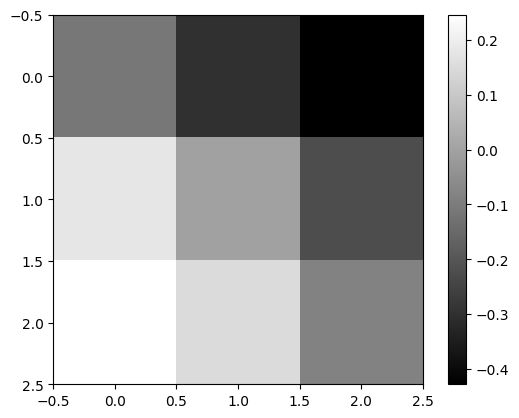

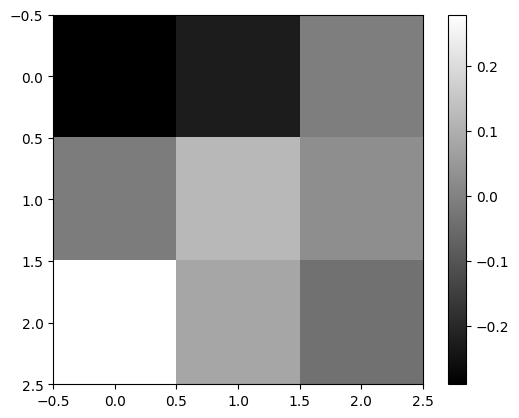

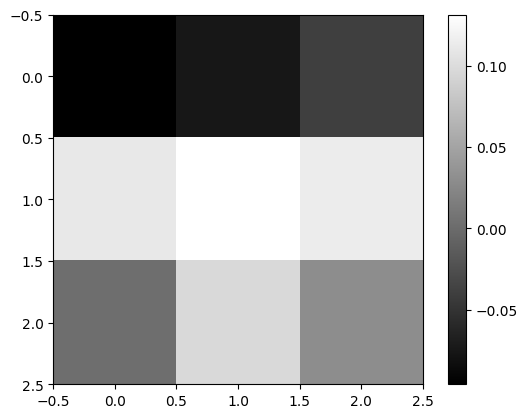

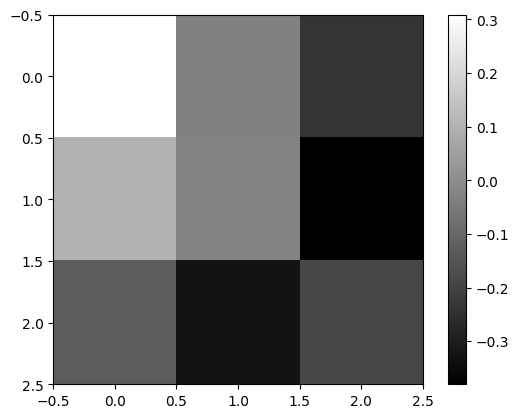

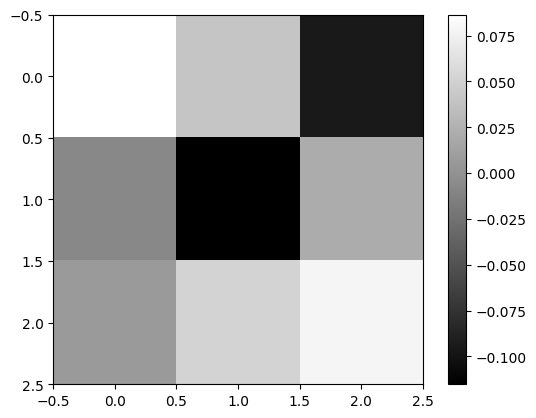

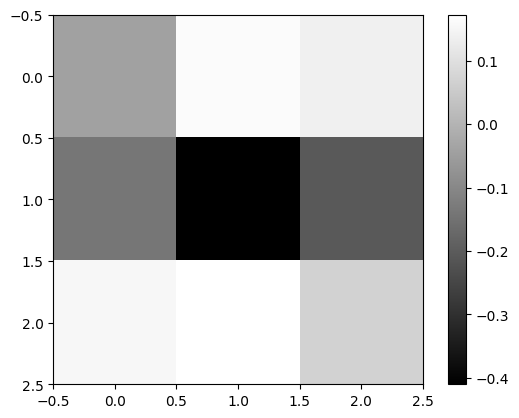

In [19]:
for i in range(6):
  plt.imshow(model.layers[0].kernel[:, :, :, i], cmap = 'gray')
  plt.colorbar()
  plt.show()

### Residual Network

In [20]:
input = Input((20, 20, 32))

In [21]:
x = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(input)
resnet_block_start = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(x)

long_path = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(resnet_block_start)
long_path = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(long_path)

concat = Concatenate()([long_path, resnet_block_start])

x = Conv2D(32, (3, 3), activation = 'relu')(concat)

In [22]:
x

<KerasTensor: shape=(None, 18, 18, 32) dtype=float32 (created by layer 'conv2d_8')>

In [23]:
resnet_block = Model(inputs = [resnet_block_start], outputs = [concat])

In [24]:
resnet_block.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 20, 20, 32)]         0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 20, 20, 32)           9248      ['input_3[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 20, 20, 32)           9248      ['conv2d_6[1][0]']            
                                                                                                  
 concatenate (Concatenate)   (None, 20, 20, 64)           0         ['conv2d_7[1][0]',            
                                                                     'input_3[0][0]']         

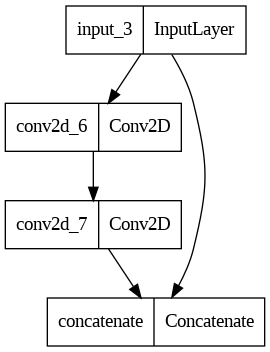

In [25]:
tf.keras.utils.plot_model(resnet_block)

In [26]:
Concatenate()([concat, concat])

<KerasTensor: shape=(None, 20, 20, 128) dtype=float32 (created by layer 'concatenate_1')>

### Network in Netwrok

In [33]:
x = Conv2D(32, (1, 1))(input)

In [34]:
one_by_one_conv = Model(inputs = [input], outputs = [x])

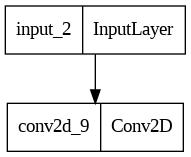

In [35]:
tf.keras.utils.plot_model(one_by_one_conv)

In [36]:
one_by_one_conv.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 20, 32)]      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 32)        1056      
                                                                 
Total params: 1056 (4.12 KB)
Trainable params: 1056 (4.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
